In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
df = pd.read_csv("/content/diabetes_dataset_first_5000.csv")

In [ ]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df['HighBP'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          5000 non-null   float64
 1   HighBP                5000 non-null   float64
 2   HighChol              5000 non-null   float64
 3   CholCheck             5000 non-null   float64
 4   BMI                   5000 non-null   float64
 5   Smoker                5000 non-null   float64
 6   Stroke                5000 non-null   float64
 7   HeartDiseaseorAttack  5000 non-null   float64
 8   PhysActivity          5000 non-null   float64
 9   Fruits                5000 non-null   float64
 10  Veggies               5000 non-null   float64
 11  HvyAlcoholConsump     5000 non-null   float64
 12  AnyHealthcare         5000 non-null   float64
 13  NoDocbcCost           5000 non-null   float64
 14  GenHlth               5000 non-null   float64
 15  MentHlth             

In [ ]:
df = df.drop(columns=['Education', 'Income'])

In [ ]:
df.to_csv('pp_Diabetes_data.csv', index=False)
from google.colab import files
files.download('pp_Diabetes_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

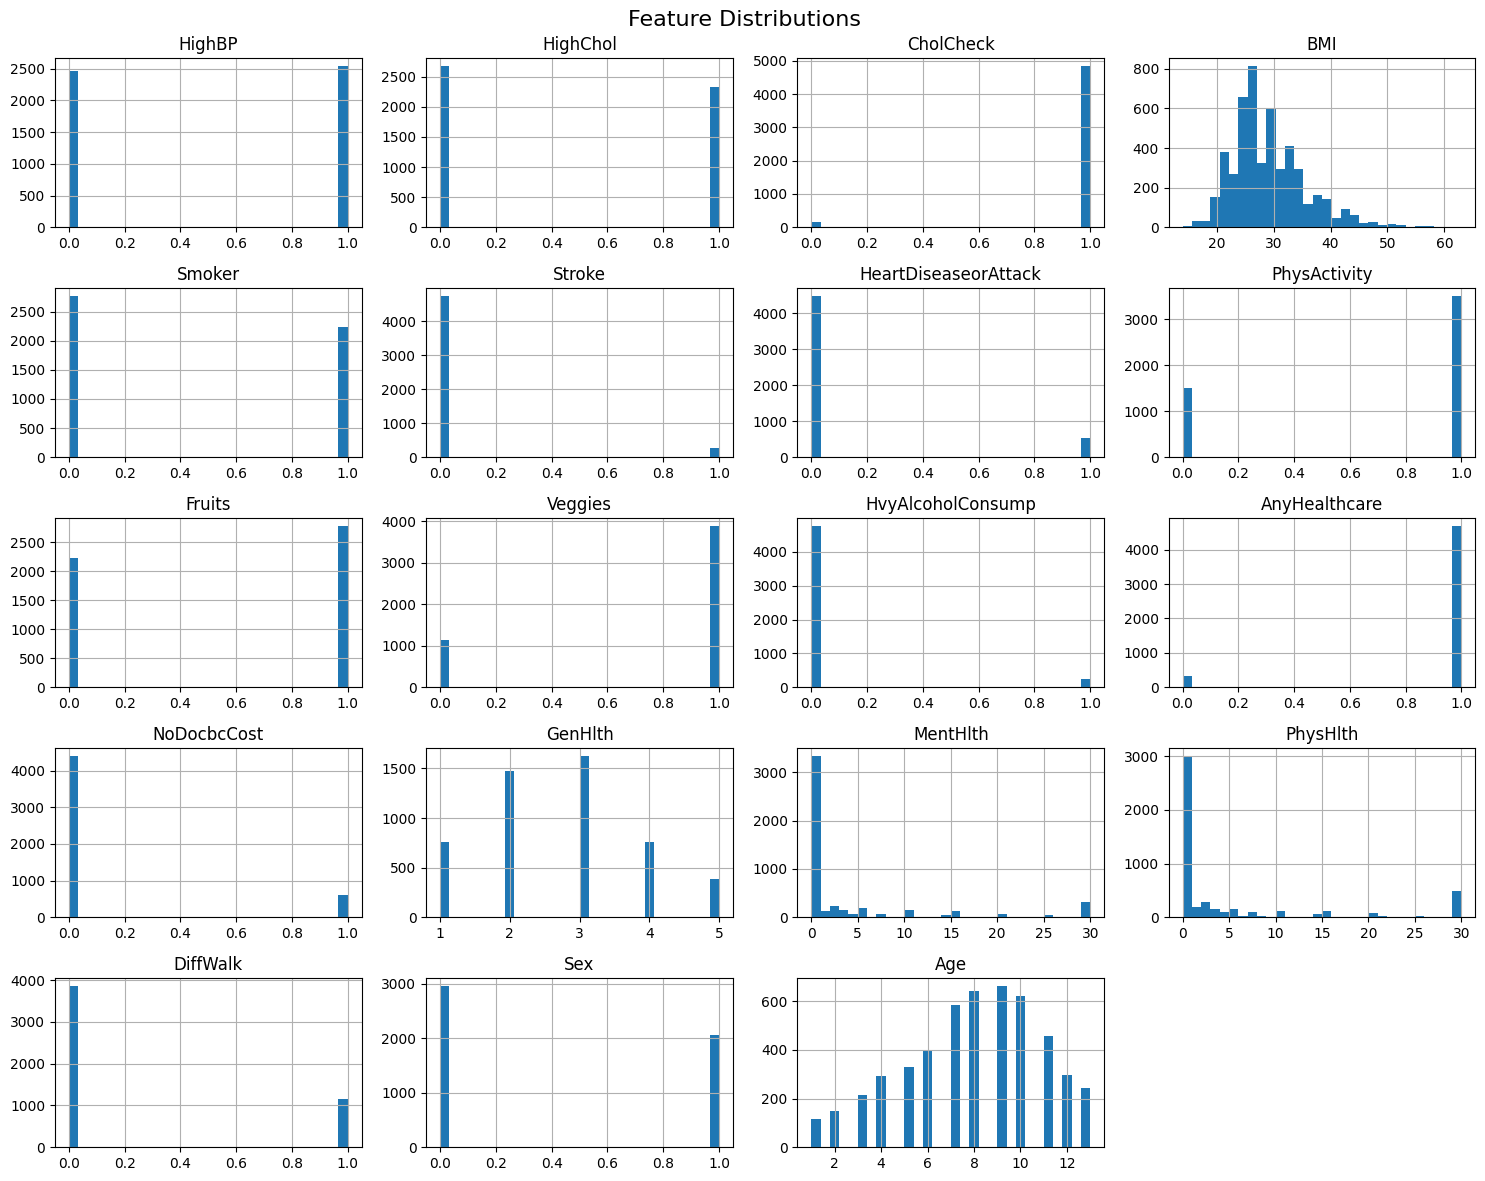

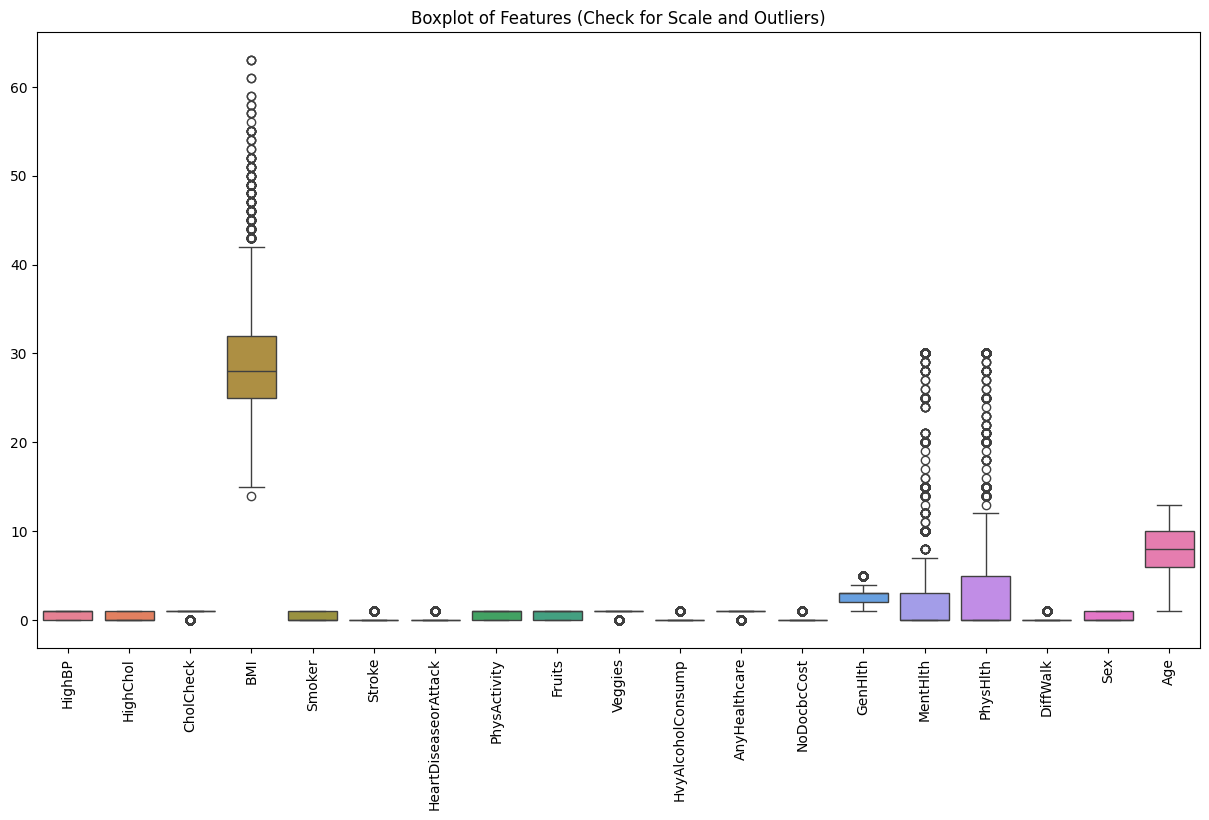

In [ ]:
features = df.drop("Diabetes_012", axis=1)

# Plot histograms
features.hist(bins=30, figsize=(15, 12))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Plot boxplots to check for outliers and scale range
plt.figure(figsize=(15, 8))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Check for Scale and Outliers)")
plt.show()


In [ ]:
scaler = StandardScaler()
cols_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth','Age']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"].astype(int)

In [ ]:
import joblib
joblib.dump(scaler, 'Diabetes_preprocessor.pkl')

['Diabetes_preprocessor.pkl']

In [ ]:
joblib.dump(model, 'Diabetes_model.pkl')

['Diabetes_model.pkl']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [ ]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_smote)

In [ ]:
model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    tree_method='hist',
    n_jobs=-1,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:48:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=-1, num_class=3, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.774
Confusion Matrix:
 [[753   2  44]
 [ 15   0   3]
 [162   0  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       799
           1       0.00      0.00      0.00        18
           2       0.31      0.11      0.17       183

    accuracy                           0.77      1000
   macro avg       0.37      0.35      0.35      1000
weighted avg       0.70      0.77      0.73      1000

